In [1]:
import pandas as pd
import numpy as np

## Read train data

In [29]:
train = pd.read_csv('./data/train.csv.zip',compression='zip', header=0, sep=',', quotechar='"')
test = pd.read_csv('./data/test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [30]:
train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
m,n = train.shape
print("shape of train dataframe {}, {}".format(m,n))

shape of train dataframe 200000, 202


In [10]:
train.dropna().shape

(200000, 202)

# Distribution of target classes

In [25]:
train.groupby('target').size()

target
0    179902
1     20098
dtype: int64

# Describe 

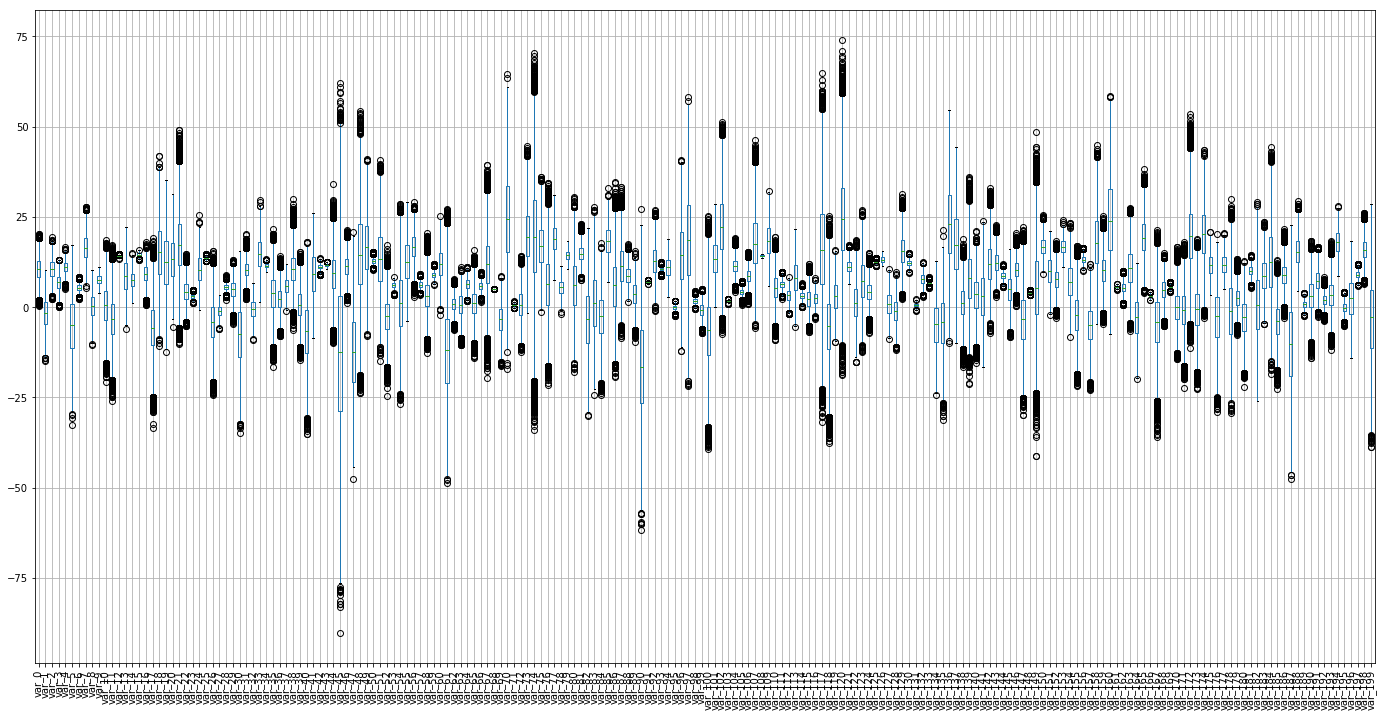

In [20]:
train.loc[:, train.dtypes == np.float64].boxplot(figsize=(24,12), rot = 90)

# Training a random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier


In [13]:
Y = train[['target']]

columns_to_select = [cols for cols in train.columns.values.tolist() if cols not in ['ID_code','target']]
X = train[columns_to_select]

In [14]:
clf = RandomForestClassifier(n_estimators=500, max_depth =10, random_state=0)

In [17]:
clf.fit(X,Y)

/home/arunkundgol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

y_pred = clf.predict(X)
print("accuracy: {}".format(accuracy_score(Y, y_pred)))
print("precision score: {}".format(average_precision_score(y_pred,Y)))

accuracy: 0.899525
precision score: 0.00014926858393870038
